In [1]:
%pylab inline
import numpy as np
import scipy
from scipy import signal
import os
import csv
from my_logger import log_progress

matplotlib.rcParams['savefig.dpi'] = 120
import seaborn as sns
sns.set_style('whitegrid',{'grid.linestyle': u'--'})

sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy')
sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy/libbootstrap')

import libbootstrap.spectralmodel as spectralmodel
import scipy
import libbootstrap.spectra_generator as spectra_generator

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from libs.models import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def file_picker(_data_file):
    global data_file
    data_file = _data_file
    print(data_file)

def __plot_inverted(rrs_num=1):
    
    _label = '$a_\phi = ' + str("{:.3f}").format(synth_data[rrs_num].x[0]) + '$' + \
    '\n $a_g = ' + str("{:.3f}").format(synth_data[rrs_num].x[2]) + '$' + \
    '\n $b_{bp} = ' + str("{:.3f}").format(synth_data[rrs_num].x[1]) + '$'

    model_rrs = dc.func(synth_data[rrs_num].x)
    measured_rrs = dc.rrs[rrs_num, :]

    pylab.plot(wavelengths, model_rrs , '--', alpha = 0.75, label=_label) #color= '0.75'

    rms = rmse(model_rrs, measured_rrs)

    pylab.plot(wavelengths, measured_rrs, alpha = 0.75, label='$RMSE = ' + str("{:.3e}").format(rms) + '$')
    pylab.xlabel('Wavelength (nm)')
    pylab.ylabel('$R_{rs}(sr^{-1})$')
    pylab.legend(frameon=True, fancybox=True, shadow=True, loc=2)
    pylab.title(sitename)
    print(synth_data[rrs_num])

    pylab.show()

class globs:
    debug = False

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def plot_inverted(rrs_num=1):
    
    _label = '$a_\phi = ' + str("{:.3f}").format(data[rrs_num].x[0]) + '$' + \
    '\n $a_g = ' + str("{:.3f}").format(data[rrs_num].x[2]) + '$' + \
    '\n $b_{bp} = ' + str("{:.3f}").format(data[rrs_num].x[1]) + '$'

    model_rrs = dc.func(data[rrs_num].x)
    measured_rrs = dc.rrs[rrs_num, :]

    pylab.plot(wavelengths, model_rrs , '--', alpha = 0.75, label=_label) #color= '0.75'

    rms = rmse(model_rrs, measured_rrs)

    pylab.plot(wavelengths, measured_rrs, alpha = 0.75, label='$RMSE = ' + str("{:.3e}").format(rms) + '$')
    pylab.xlabel('Wavelength (nm)')
    pylab.ylabel('$R_{rs}(sr^{-1})$')
    pylab.legend(frameon=True, fancybox=True, shadow=True, loc=2)
    pylab.title(sitename)
    print(data[rrs_num])

    pylab.show()

In [3]:
options={'ARM': '0_ARM_14Nov11_1212.csv',
         'BLA': '0_BLA_14Nov11_1146.csv',
         'HEA': '0_HEA_14Nov11_1232.csv', 
         'KIN': '0_KIN_14Nov11_1506.csv',
         'MAY': '0_MAY_14Nov11_1409.csv',
         'NAR': '0_NAR_14Nov11_1257.csv',
         'NIL': '0_NIL_14Nov11_1320.csv',
         'RON': '0_RON_14Nov11_1441.csv',
         'STJ': '0_STJ_14Nov11_1350.csv',
         'SUC': '0_SUC_14Nov11_1527.csv'}

interact(file_picker, _data_file=options)

0_ARM_14Nov11_1212.csv


In [4]:
print(data_file)
path, filename = os.path.split(data_file)

sitename =  options.keys()[options.values().index(filename)]
print(sitename)

data_directory = './inputs/swan_data'
image_directory = './img'
#data_file = '0_BLA_14Nov11_1146.csv'
data_file = os.path.join(data_directory, data_file)
print(data_file)
rrs = np.genfromtxt(data_file, delimiter=',')

0_ARM_14Nov11_1212.csv
ARM
./inputs/swan_data/0_ARM_14Nov11_1212.csv


In [5]:
window = 5
poly = 2

start = 5
stop = 2

num_realizations = 200

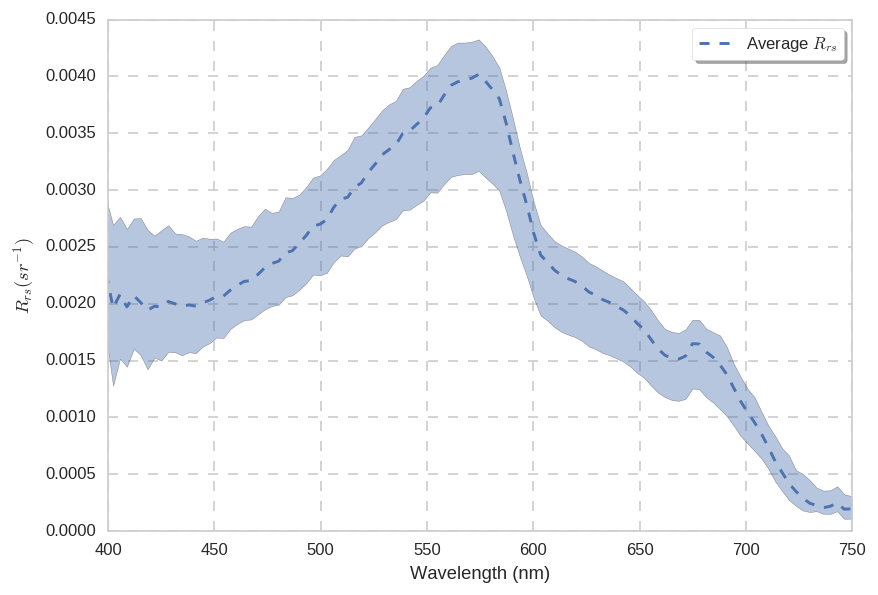

In [6]:
min_rrs = np.amin(rrs[start:stop * -1,:], axis=0)
max_rrs = np.amax(rrs[start:stop * -1,:], axis=0)
mean_rrs = np.median(rrs[start:stop * -1,:], axis=0)

pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=0.4)
pylab.plot(rrs[0,:], mean_rrs, '--', label='Average $R_{rs}$')
pylab.xlim([400, 750])
pylab.legend(frameon=True, fancybox=True, shadow=True)
pylab.xlabel('Wavelength (nm)')
pylab.ylabel('$R_{rs}(sr^{-1})$')
#pylab.ylim([0, 0.005])

'09/04/2016 09:29:01 PM' :: libbootstrappy :: INFO :: Reading :: ./inputs/swan_data/0_ARM_14Nov11_1212.csv


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(400, 750)

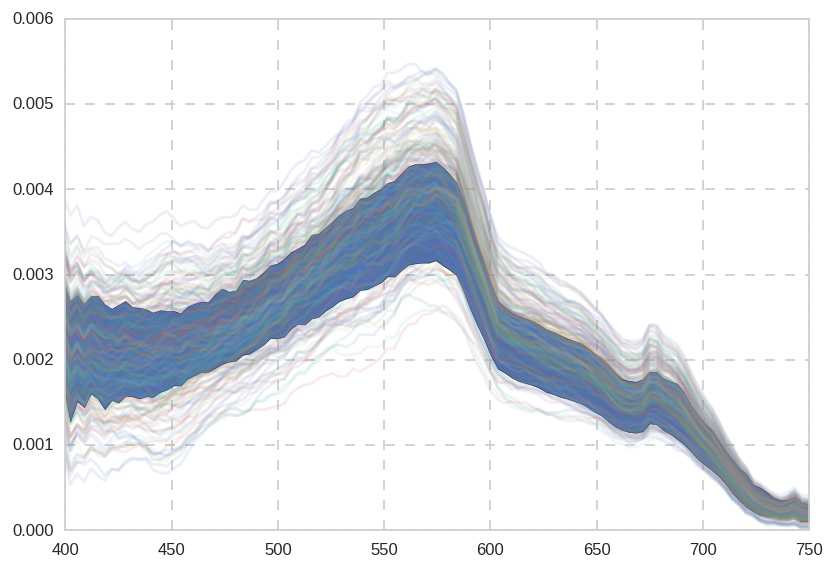

In [7]:
sm = spectralmodel.BuildSpectralModel(data_file)

#for row in sm.Rrs:
#    pylab.plot(sm.wave, row)


sm._detrend()
sm._calc_std_delta_Rrs()
sm._calc_normalised_difference_Rrs()
sm._calc_power_spectrum()

sg = spectra_generator.GenerateRealisation(sm, num_realizations)
rn = sg._gen_random_numbers(num_realizations)
N = sg._calc_fft_random_numbers()
Y = sg._calc_rand_powerspectrum()
y = sg._calc_inv_rand_powerspectrum() # lowercase y
y_hat = sg._calc_normalised_difference_inv_rand_powerspectrum()
z = sg._calc_z()
# pinch an Rrs from sm 
#Rrs_1 = Rrs[50, :] #sm.mean_Rrs  This isa spoof!

# Generate realisations from it.
#print(Rrs)
Rrs = sg.gen_Rrs()

for row in Rrs:
    pylab.plot(sm.wave, row, alpha= 0.1)
    
pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=1)
pylab.xlim([400, 750])
#pylab.ylim([0, 0.005])

   status: 0
  success: True
     njev: 27
     nfev: 135
 hess_inv: array([[ 1473.22154555,    90.54720571,  -458.47949698],
       [   90.54720571,     6.87916532,   -15.29025889],
       [ -458.47949698,   -15.29025889,   327.75638004]])
      fun: 5.3988159300333306e-05
        x: array([ 0.51942894,  0.06033268,  0.04042564])
  message: 'Optimization terminated successfully.'
      jac: array([  1.09485973e-06,   1.62733613e-06,   1.45038484e-06])


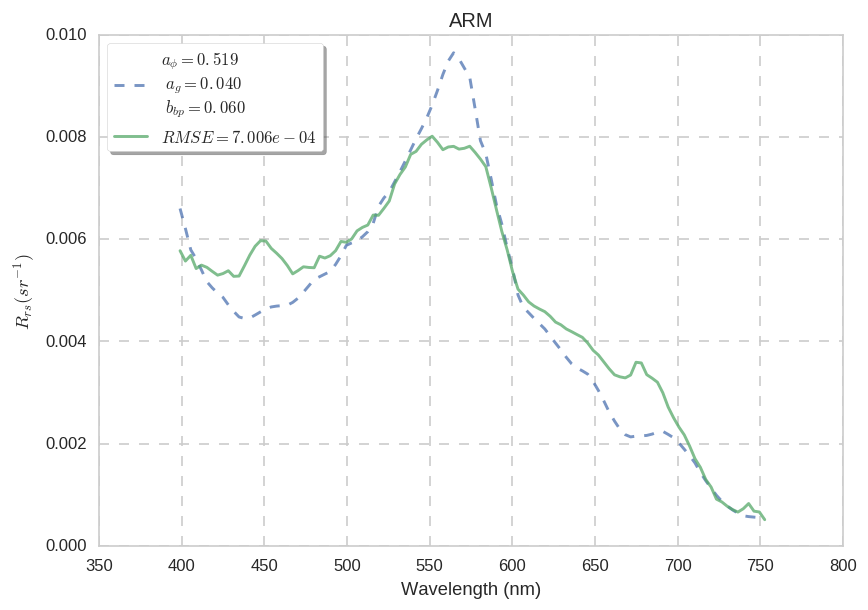

./inputs/swan_data/0_ARM_14Nov11_1212.csv


In [8]:
wavelengths = rrs[0, :]

dc = HopeDeep(wavelengths);
dc.rrs = np.genfromtxt(data_file, delimiter=',')
dc.read_all_iops_from_files();

data = dc.run(num_iters=1);

interact(plot_inverted,rrs_num=(1, len(data)))
print(data_file)

   status: 0
  success: True
     njev: 22
     nfev: 110
 hess_inv: array([[ 15387.11873654,   1030.46130391,  22091.96420147],
       [  1030.46130391,     74.79063349,   1479.73858578],
       [ 22091.96420147,   1479.73858578,  31721.49618085]])
      fun: 1.6604495288034516e-05
        x: array([ 1.71460773,  0.13861814,  1.98211621])
  message: 'Optimization terminated successfully.'
      jac: array([  7.58144620e-06,  -2.70485862e-06,  -5.16111777e-06])


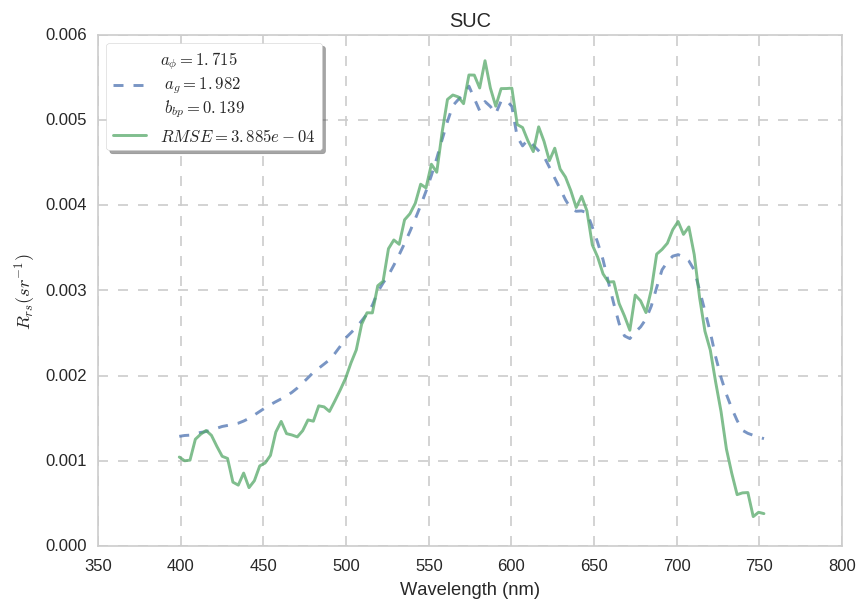

./inputs/swan_data/0_SUC_14Nov11_1527.csv


In [15]:
wavelengths = rrs[0, :]

dc = HopeDeep(wavelengths);
dc.rrs = np.genfromtxt("./inputs/rrs_files/" + sitename + "synthRrs.csv", delimiter=',')
dc.read_all_iops_from_files();

synth_data = dc.run(num_iters=1);

interact(__plot_inverted,rrs_num=(1, len(synth_data)))
print(data_file)